In [2]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA

C:\Users\celin\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\celin\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


### Question 1
Load the telco data from Lab 3, and perform a train-test split. Now scale the data, using StandardScaler. To do this, you fit the scaler to the train data and use that to transform both the train and test data. Now build the MLP model, and print the results. How do they compare with the MLP results without scaling (from Lab 3)?

In [13]:
df = pd.read_csv("2018-2014_Financial_Data.csv")
X = df.drop(['Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=42)

In [14]:
df.head()

,Unnamed: 0,Year,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,2018,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,2018,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,2018,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,2018,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,2018,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [16]:
scaler = StandardScaler().fit(X_train)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#learning MLP model
from sklearn.neural_network import MLPClassifier 
mlp = MLPClassifier().fit(X_train_scaled, y_train)
print("Accuracy on scaled test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


ValueError: could not convert string to float: 'OSTK'

### Question 2
Read the HomesSoldHellerup.csv file, using the pandas read_csv method (note that the separator is a semicolon and not a comma, which is the default). How many different values are there for the Type feature? What about Type of Sale?

In [37]:
homes = pd.read_csv("HomesSoldHellerup.csv", sep=';')
homes.head()


,Road name,Road Number,Type,m2,Build Year,ZipCode,City,Date of Sale,Type of Sale,Price
0,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,20-07-15,Alm. Salg,1700000
1,Tuborgvej,54,Lejlighed,87,1932,2900,Hellerup,12-05-15,Alm. Salg,2815000
2,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,29-12-10,Alm. Salg,1575000
3,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,10-04-12,Alm. Salg,1340000
4,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,04-02-12,Alm. Salg,1435000


In [45]:
print("Counts of 'Types of Sale' features:", homes.Type.value_counts())
print("Counts of 'Types of Sale' features:", homes['Type of Sale'].value_counts())


Counts of 'Types of Sale' features: Lejlighed          1237
Villa               742
Rækkehus            174
Stuehus               3
Døgninstitution       2
Erhverv               2
Name: Type, dtype: int64
Counts of 'Types of Sale' features: Alm. Salg    1978
Fam. Salg     109
Andet          52
Auktion        21
Name: Type of Sale, dtype: int64


### Question 3
Assign to X a list of the features, m2 and Build Year. The target value y is Price. Perform a test-train split, and then create a Linear Regression model. What results do you get? 

In [70]:
X=homes[['m2', "Build Year"]];
y=homes['Price']

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


       m2  Build Year
0      54        1932
1      87        1932
2      63        1932
3      54        1932
4      63        1932
...   ...         ...
2155  163        1900
2156  128        1915
2157  182        1963
2158  202        2007
2159  202        2011

[2160 rows x 2 columns]
Training set score: 0.32
Test set score: 0.35


### Question 4

Try a Random Forest regressor on this data, with 30 estimators. What are the results here?

In [95]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=30, random_state=0)
forest.fit(X_train, y_train)
train_score = forest.score(X_train, y_train)
test_score = forest.score(X_test, y_test)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))


Accuracy on training set: 0.723
Accuracy on test set: 0.015


### Question 5
Assign to X the features m2, Build Year and Type. Create dummy values for Type, using the get_dummies method. How many features are there now?

In [103]:
X=homes[['m2', "Build Year", 'Type']]
data_dummies = pd.get_dummies(X)

print("Features after get_dummies:\n", list(data_dummies.columns))

Features after get_dummies:
 ['m2', 'Build Year', 'Type_Døgninstitution', 'Type_Erhverv', 'Type_Lejlighed', 'Type_Rækkehus', 'Type_Stuehus', 'Type_Villa']


In [91]:
data_dummies.head()

,m2,Build Year,Type_Døgninstitution,Type_Erhverv,Type_Lejlighed,Type_Rækkehus,Type_Stuehus,Type_Villa
0,54,1932,0,0,1,0,0,0
1,87,1932,0,0,1,0,0,0
2,63,1932,0,0,1,0,0,0
3,54,1932,0,0,1,0,0,0
4,63,1932,0,0,1,0,0,0


In [97]:
print("Data shape:", data_dummies.shape)
#eight features

Data shape: (2160, 8)


### Question 6
Perform test-train split again using the dummy features, and then do another Linear Regression. What results do you get? 

In [109]:
D = data_dummies
D_train, D_test, y_train, y_test = train_test_split(D, y, random_state=42)

lr = LinearRegression().fit(D_train, y_train)
print("Training set score: {:.2f}".format(lr.score(D_train, y_train))) 
print("Test set score: {:.2f}".format(lr.score(D_test, y_test)))


Training set score: 0.33
Test set score: 0.36


### Question 7
Try Random Forest regression using the dummy features, and report those results.

In [143]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=30, random_state=0)
forest.fit(D_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(D_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(D_test, y_test)))

Accuracy on training set: 0.937
Accuracy on test set: 0.526


### Question 8 (optional)
Try adding some additional features from the original HomesSoldHellerup data, converting them to dummies if necessary. What other features have predictive value? Find the best subset of features you can, and try various settings of hyperparameters. What is the best result you can get? (You can test this with Linear Regression or Random Forest)

In [144]:
d=homes[['m2', "Build Year", 'Type', 'ZipCode']]
X1 = pd.get_dummies(d)
X1.head()

,m2,Build Year,ZipCode,Type_Døgninstitution,Type_Erhverv,Type_Lejlighed,Type_Rækkehus,Type_Stuehus,Type_Villa
0,54,1932,2900,0,0,1,0,0,0
1,87,1932,2900,0,0,1,0,0,0
2,63,1932,2900,0,0,1,0,0,0
3,54,1932,2900,0,0,1,0,0,0
4,63,1932,2900,0,0,1,0,0,0


In [145]:
y = homes['Price']
scaler = StandardScaler()
scaler.fit(X1)
X1_scaled = scaler.transform(X1)
pca = PCA(n_components=2)
pca.fit(X1_scaled)

X1_pca = pca.transform(X1_scaled)
print("Original shape: {}".format(str(X1_scaled.shape)))
print("Reduced shape: {}".format(str(X1_pca.shape)))

print("PCA component shape: {}".format(pca.components_.shape))
print("PCA components:\n{}".format(pca.components_))


Original shape: (2160, 9)
Reduced shape: (2160, 2)
PCA component shape: (2, 9)
PCA components:
[[ 0.50657716 -0.23063848  0.08013122  0.04004188  0.01094476 -0.58702371
   0.04818167  0.05258732  0.57650463]
 [-0.02269822  0.07794557  0.6989236  -0.01396474 -0.00660376  0.0309154
  -0.01719775  0.70540438 -0.07635175]]


Text(0, 0.5, 'Principal components')

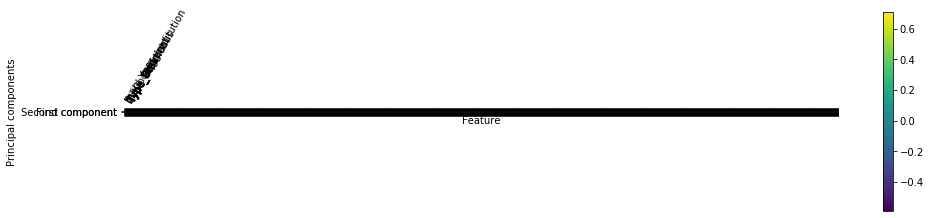

In [146]:
plt.matshow(pca.components_, cmap='viridis') 
plt.yticks([0, 1], ["First component", "Second component"]) 
plt.colorbar() 
plt.xticks(range(len(X1)), X1, rotation=60, ha='left') 
plt.xlabel("Feature") 
plt.ylabel("Principal components")
